 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 03 : Statistical Classification</b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Linear Classification </b> <br>
In this programming assignment, you will get a chance to implement different linear classification models. You will start off with simple algorithms like Least Squares classification, LDA and FDA. Further you will be implementing perceptron algorithm. Finally you will be implementing probabilistic approaches for classification. To get further insights into these classification methods you will be drawing few critical comparisions between their performance and application scenario.




**Part-1) Least squares for classification**

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3. Further, generate a test set [X_test, Y_test] from the same distribution, starting with 200 samples per class.
2. Write a function LS_Classify to generate predictions Y_pred for the 2-class data generated.
3. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
4. Visualize the obtained results, write a function to generate & visualize the decision boundary between the classes, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib notebook

np.random.seed(6996)

<IPython.core.display.Javascript object>


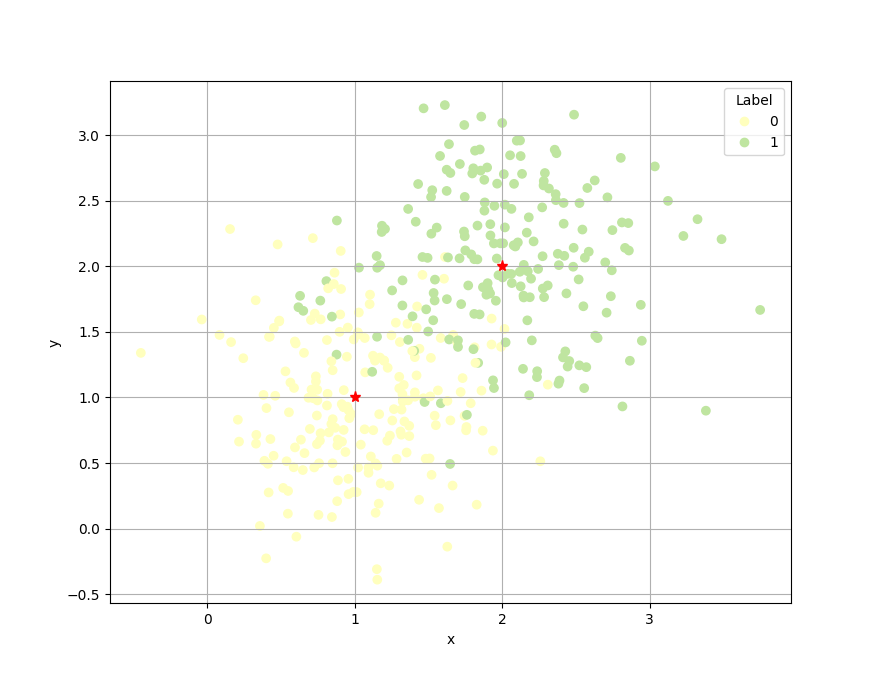

In [2]:
########################################
#Part-1)-1: Data generation
########################################

def gen_gau_data(N):
    var = 0.3
    cov = np.diag([var, var])
    c0 = [1, 1]
    c1 = [2, 2]
    
    zeros = np.zeros((N, 1))
    X = np.vstack((np.random.multivariate_normal(mean=c0, cov=cov, size=N), np.random.multivariate_normal(mean=c1, cov=cov, size=N)))
    Y = np.vstack((zeros, zeros+1))
    Y = Y.astype(int)
    
    idx = np.arange(2*N)
    np.random.shuffle(idx)
    X = X[idx, :]
    Y = Y[idx, :]
    return X, Y

X_train, Y_train = gen_gau_data(50)
X_test, Y_test = gen_gau_data(200)


fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [3]:
def one_hot_encode(Y, nClasses):
    Y_one = np.zeros((Y.shape[0], nClasses))
    Y_one[(Y == 0)[:, 0], :] = np.array([1, 0])
    Y_one[(Y == 1)[:, 0], :] = np.array([0, 1])
    return Y_one
Y_train_one = one_hot_encode(Y_train, 2)
Y_test_one = one_hot_encode(Y_test, 2)

In [4]:
########################################
#Part-1)-2
########################################
def LS_opt(X, Y):
    X_train_biased = np.hstack((X, np.ones((X.shape[0], 1))))
    W = np.linalg.inv(X_train_biased.T@X_train_biased)@X_train_biased.T@Y
    return W

def LS_inference(W, X):
    X_biased = np.hstack((X, np.ones((X.shape[0], 1))))
    Y_pred = X_biased@W
    Y_hat = np.zeros((X.shape[0], 1))
    Y_hat[Y_pred[:, 0] <= Y_pred[:, 1]] = 1 
    return Y_hat

def LS_Classify(X_train, Y_train, X_test):
    W = LS_opt(X_train, Y_train)
    return W, LS_inference(W, X_test)

LS_W, Y_pred = LS_Classify(X_train, Y_train_one, X_test)

In [5]:
##########################################
#Part-1)-3
##########################################
def LS_Classify_Accuracy(Y_test, Y_pred):
    acc = np.mean(Y_test == Y_pred)*100
    return acc
print("Least squares accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))

Least squares accuracy is 91.75%


<IPython.core.display.Javascript object>


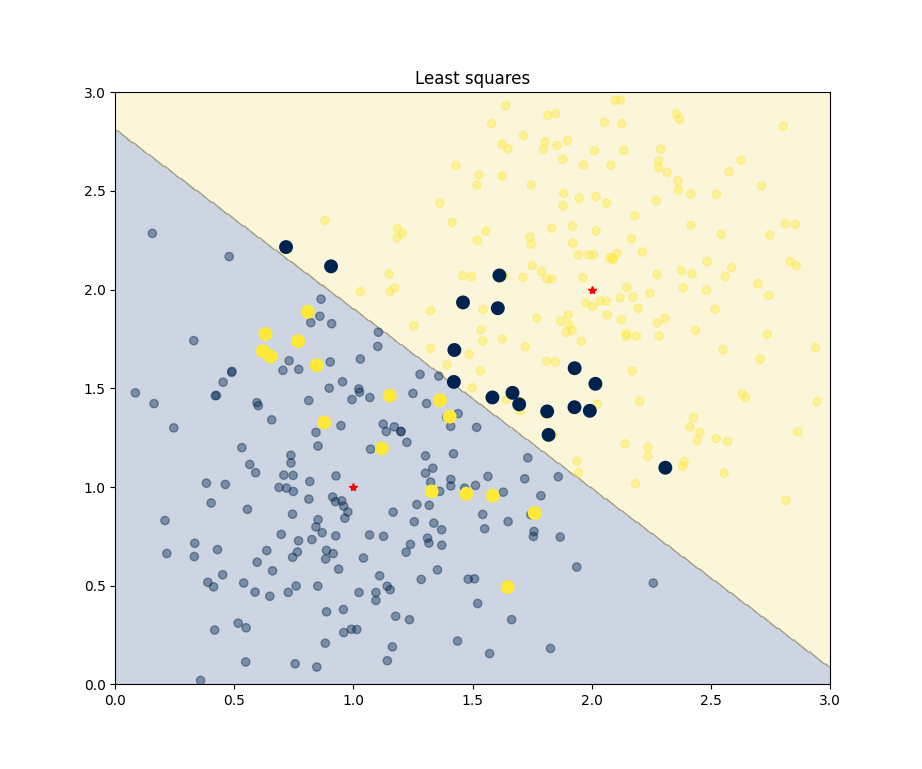

In [6]:
##########################################
#Part-2)-4: Plot the classification results along with decision boundary
##########################################

x_grid = np.linspace(0, 3, 500)
y_grid = np.linspace(0, 3, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = LS_inference(LS_W, grid)
zz = predictions.reshape(xx.shape)

def plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=None, title=""):
    plt.figure()
    plt.title(title)
    plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='cividis', alpha=0.4)
    wrong_idx = (Y_test != Y_pred)[:, 0]
    
    plt.scatter(X_test[wrong_idx, 0], X_test[wrong_idx, 1], c=Y_test[wrong_idx], cmap='cividis', alpha=1, linewidths=4)
    if points:
        for i in points:
            plt.plot(i[0], i[1], "r*")


plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Least squares")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()



<b> Part - (2) : Understanding Linear & Fisher Discriminant analysis </b>

Part - (2) (a) : In this part of the programming assignment, you will learn how to code linear discriminant projections and Fisher discriminant projections. 

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2, 2), both with variance 0.3.
2. Write a function to perform projection from 2-D space to 1-D using Linear discriminant analysis. Please note that it considers only between-class covariance in to account
3. Project above generated 2-D synthetic data into 1-D and perform classification. Plot both original and projected data points in the same plot.
4. Write a function to perform projection from 2-D space to 1-D using Fisher discriminant analysis. Please note that it considers both between-class convariance and within-class covariance into account
5. Project above generated 2-D synthetic data into 1-D and perform classification. Plot both original and projected data points in the same plot.
6. Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension. 

In [7]:
########################################
#Part-2)-1: Data generation
########################################

def gen_gau_data(N):
    var = 0.3
    cov = np.diag([var, var])
    c0 = [1, 1]
    c1 = [2, 2]
    
    zeros = np.zeros((N, 1))
    X = np.vstack((np.random.multivariate_normal(mean=c0, cov=cov, size=N), np.random.multivariate_normal(mean=c1, cov=cov, size=N)))
    Y = np.vstack((zeros, zeros+1))
    Y = Y.astype(int)
    
    idx = np.arange(2*N)
    np.random.shuffle(idx)
    X = X[idx, :]
    Y = Y[idx, :]
    return X, Y

X_train, Y_train = gen_gau_data(50)
X_test, Y_test = gen_gau_data(200)

In [8]:
########################################
#Part-2)-(a) 2: 
########################################
def LDA_project(X, Y):
    mu2 = np.mean(X[Y], axis=0)
    mu1 = np.mean(X[1-Y], axis=0)
    
    w = (mu1-mu2).T
    w /= np.linalg.norm(w)
    return w, X@w

Accuracy of LDA classification using LS is 90.75%


<IPython.core.display.Javascript object>


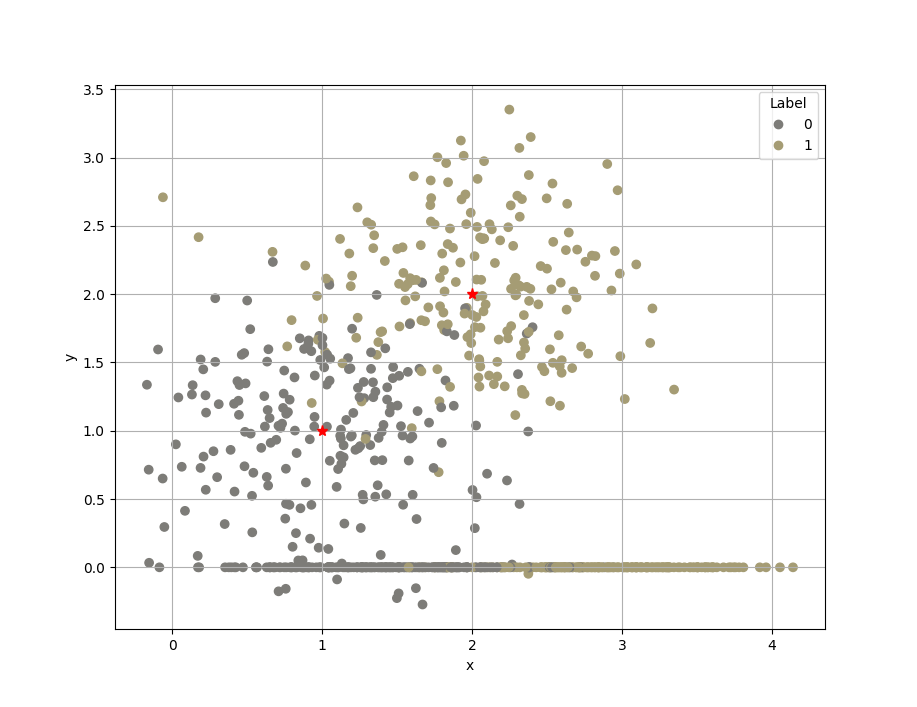

In [9]:
########################################
#Part-2)-(a) 3
########################################
def LDA_classify(X_train, Y_train, X_test):
    lda_projector, low_x_train = LDA_project(X_train, Y_train)
    low_x_test = X_test@lda_projector
    Y_train_one = one_hot_encode(Y_train, 2)
    LS_W, Y_pred = LS_Classify(low_x_train, Y_train_one, low_x_test)
    return lda_projector, low_x_train, low_x_test, LS_W, Y_pred
lda_projector, low_x_train, low_x_test, LS_W, Y_pred = LDA_classify(X_train, Y_train, X_test)

print("Accuracy of LDA classification using LS is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))

#Plot
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, vmin=-3, vmax=3, cmap="cividis")
ax.scatter(low_x_test, np.zeros(low_x_test.shape), vmin=-3, vmax=3, c=Y_test, cmap="cividis")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [10]:
########################################
#Part-2)-(a) 4
########################################
def FDA_project(X, Y):
    mu2 = np.mean(X[Y], axis=0)
    mu1 = np.mean(X[1-Y], axis=0)
    
    Sw = (X[Y]-mu2)@((X[Y]-mu2)).T + (X[1-Y]-mu1)@((X[1-Y]-mu1)).T
    w = np.linalg.inv(Sw)@(mu1-mu2)
    w /= np.linalg.norm(w)
    return w, X@w

Accuracy of FDA classification using LS is 90.75%


<IPython.core.display.Javascript object>


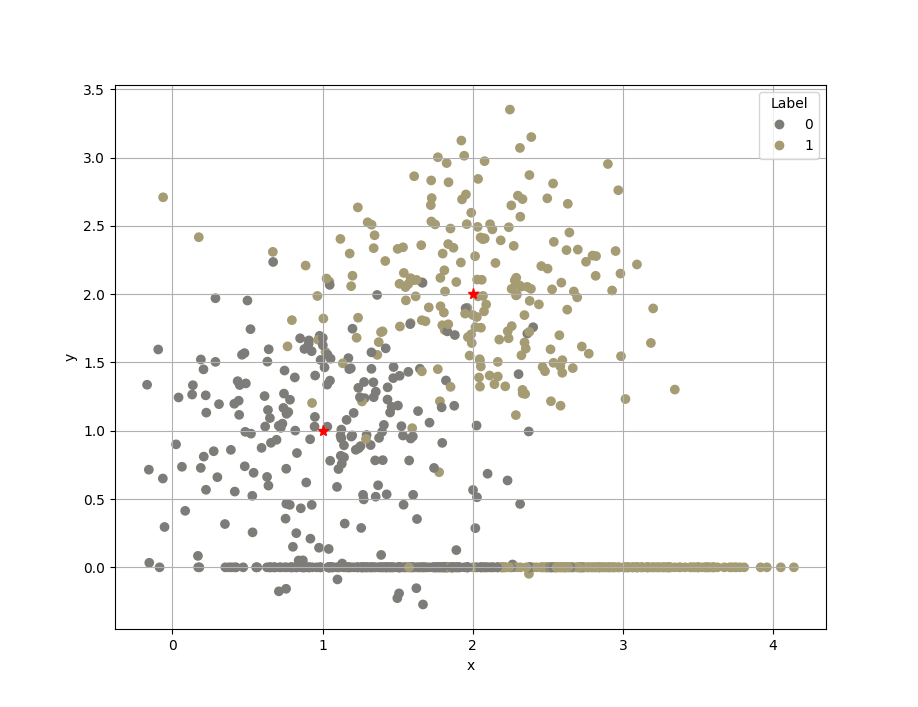

In [11]:
########################################
#Part-2)-(a) 5
########################################
def FDA_classify(X_train, Y_train, X_test):
    fda_projector, low_x_train = FDA_project(X_train, Y_train)
    low_x_test = X_test@fda_projector
    Y_train_one = one_hot_encode(Y_train, 2)
    LS_W, Y_pred = LS_Classify(low_x_train, Y_train_one, low_x_test)
    return fda_projector, low_x_train, low_x_test, LS_W, Y_pred

fda_projector, low_x_train, low_x_test, LS_W, Y_pred = LDA_classify(X_train, Y_train, X_test)

print("Accuracy of FDA classification using LS is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))

#Plot
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, vmin=-3, vmax=3, cmap="cividis")
ax.scatter(low_x_test, np.zeros(low_x_test.shape), vmin=-3, vmax=3, c=Y_test, cmap="cividis")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

<IPython.core.display.Javascript object>


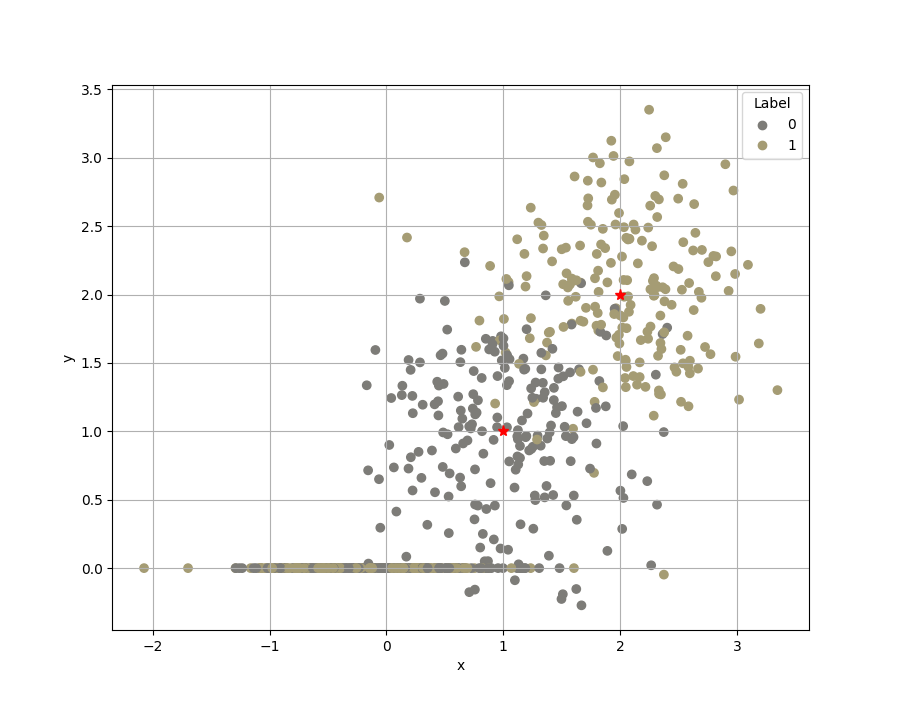

In [12]:
########################################
#Part-2)-(a) 6
########################################
def FDA_project_K(X, Y, K):
    unq = np.unique(Y)
    assert K < unq.shape[0]
    X_class = []
    for i in unq:
        X_class.append(X[(Y == i)[:, 0]])
    
    mu = []
    for x in X_class:
        mu.append(np.mean(x, axis=0))
    mean = np.mean(X, axis=0).reshape(-1, 1)
    
    Sw = 0
    for i in range(len(X_class)):
        xk = X_class[i]
        mk = mu[i].reshape(1, 2)
        Sw += ((xk-mk).T)@(xk-mk)
    
    St = ((X - mean.T).T)@(X - mean.T)
    Sb = St - Sw
    e = np.linalg.inv(Sw)@Sb
    E, U = np.linalg.eig(e)
    eigen_values = np.round(E, 4)
    idx = eigen_values != 0
    W = U[idx, :].T
    W /= np.linalg.norm(W, axis=0)
    return W, X@W

W, low_x_test = FDA_project_K(X_test, Y_test, 1)

#Plot
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, vmin=-3, vmax=3, cmap="cividis")
ax.scatter(low_x_test, np.zeros(low_x_test.shape), vmin=-3, vmax=3, c=Y_test, cmap="cividis")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

<b> Part (3) : Implimenting Perceptron Algorithm </b> 
1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3. 
2. Implement perceptron algorithm and classify the above generated synthetic data using perceptron algorithm and plot the decision boundary/regions.
3. Add true outliers to one of the classes in the above generated synthetic data and perform classification using perceptron algorithm. Plot the decision boundary/regions. Compare and contrast the decision boundaries learned using least squares and perceptron approach.
4. Use Gaussian distribution with appropriate parameters and produce a dataset with four classes and 30 samples per class: the classes must live in the 2D space and be centered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), all with variance 0.3. Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1. representing XOR problem and classify it using the perceptron algorithm.
5. Report your observations


In [13]:
########################################
#Part-3)-1: Data generation
########################################

def gen_gau_data(N):
    var = 0.3
    cov = np.diag([var, var])
    c0 = [1, 1]
    c1 = [2, 2]
    
    zeros = np.zeros((N, 1))
    X = np.vstack((np.random.multivariate_normal(mean=c0, cov=cov, size=N), np.random.multivariate_normal(mean=c1, cov=cov, size=N)))
    Y = np.vstack((zeros, zeros+1))
    Y = Y.astype(int)
    
    idx = np.arange(2*N)
    np.random.shuffle(idx)
    X = X[idx, :]
    Y = Y[idx, :]
    return X, Y

X_train, Y_train = gen_gau_data(50)
X_test, Y_test = gen_gau_data(200)

In [14]:
########################################
#Part-3)-2
########################################
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
    
def Perceptron_inference(W, X):
    X_biased = np.hstack((X, np.ones((X.shape[0], 1))))
    Y_hat = X_biased@W
    Y_pred = np.empty_like(Y_hat)
    Y_pred[Y_hat >= 0] = 0
    Y_pred[Y_hat < 0] = 1
    return Y_pred

def Perceptron_opt(X, Y, MAX_ITR=1000, eta=1):
    X_train_biased = np.hstack((X, np.ones((X.shape[0], 1))))
    W = np.zeros((X_train_biased.shape[1], 1))
    nMiss = 0
    
    Y_hat = Perceptron_inference(W, X)
    idx = (Y_hat != Y)[:, 0]
    nMiss = np.sum(idx)
    step = 0
    ws = [W]
    Y_new = -2*Y + 1
    
    while (nMiss != 0):
        if step < MAX_ITR:
            X_m = X_train_biased[idx]
            T = Y_new[idx]
            for i in range(nMiss):
                up = eta*(X_m[i]*T[i])
                up = up.reshape(-1, 1)
                W = W + up
                
                ws.append(W)
                Y_hat = Perceptron_inference(W, X)
                idx = (Y_hat != Y)[:, 0]
                nMiss = np.sum(idx)
                if nMiss == 0:
                    break
                step += 1
        else:
            print("MAXIMUM ITERATIONS REACHED!!")
            break
    print("Number of miss classification in training = {}".format(nMiss))
    print("Training accuracy with Perceptron algorithm = {}%".format(np.round(LS_Classify_Accuracy(Y_train, Y_hat), 4)))
    return W, ws
    

def Perceptron(X_train, Y_train, X_test, MAX_ITR=1000, eta=1):
    W, ws = Perceptron_opt(X_train, Y_train, MAX_ITR=MAX_ITR, eta=eta)
    Y_pred = Perceptron_inference(W, X_test)
    return W, ws, Y_pred

MAXIMUM ITERATIONS REACHED!!
Number of miss classification in training = 14
Training accuracy with Perceptron algorithm = 86.0%

Testing accuracy with Perceptron algorithm = 83.75%


<IPython.core.display.Javascript object>


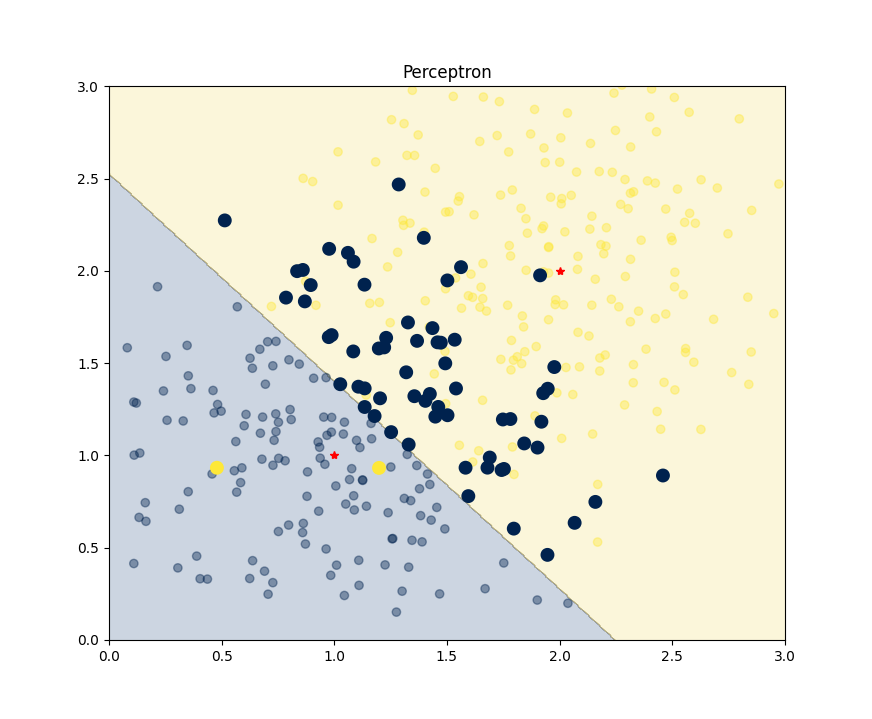

In [15]:
W, ws, Y_pred = Perceptron(X_train, Y_train, X_test, MAX_ITR=20000, eta=1)
print("\nTesting accuracy with Perceptron algorithm = {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 4)))


x_grid = np.linspace(0, 3, 500)
y_grid = np.linspace(0, 3, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = Perceptron_inference(W, grid)
zz = predictions.reshape(xx.shape)


plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Perceptron")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

<IPython.core.display.Javascript object>


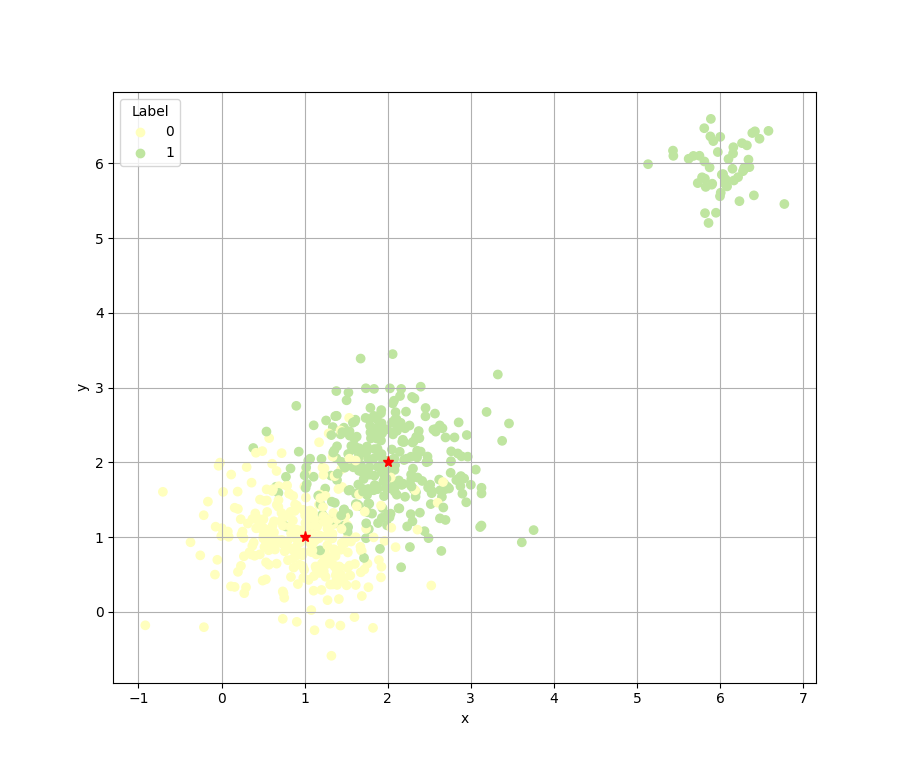

In [16]:
##########################################
#Part-3)-3: With outliers. Compare with Least Squares
##########################################

X_train_g, Y_train_g = gen_gau_data(300)
X_train, Y_train = gen_gau_data(50)


N = 50
cov = np.diag([0.1, 0.1])
X_outlier = np.random.multivariate_normal(mean=[6, 6], cov=cov, size=N)
Y_outlier = np.ones((N, 1))

X_new = np.vstack((X_train_g, X_outlier))
Y_new = np.vstack((Y_train_g, Y_outlier))
idx = np.arange(X_new.shape[0])

np.random.shuffle(idx)

X_new = X_new[idx]
Y_new = Y_new[idx]

fig, ax = plt.subplots()
scatter = ax.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

def split_dataset(X, Y, validation_split):
    m = X.shape[0]
    m_valid = int(validation_split*m)
    
    shuffler = np.arange(m)
    np.random.shuffle(shuffler)

    X_train = X[shuffler[:(m-m_valid)]]
    Y_train = Y[shuffler[:(m-m_valid)]]
    X_valid = X[shuffler[-1*(m_valid):]]
    Y_valid = Y[shuffler[-1*(m_valid):]]
    
    return X_train, X_valid, Y_train, Y_valid 

validation_split = 0.5

X_train, X_valid, Y_train, Y_valid = split_dataset(X_new, Y_new, validation_split)

## Outlier analysis with LS approach

Least squares with outliers accuracy is 86.77%


<IPython.core.display.Javascript object>


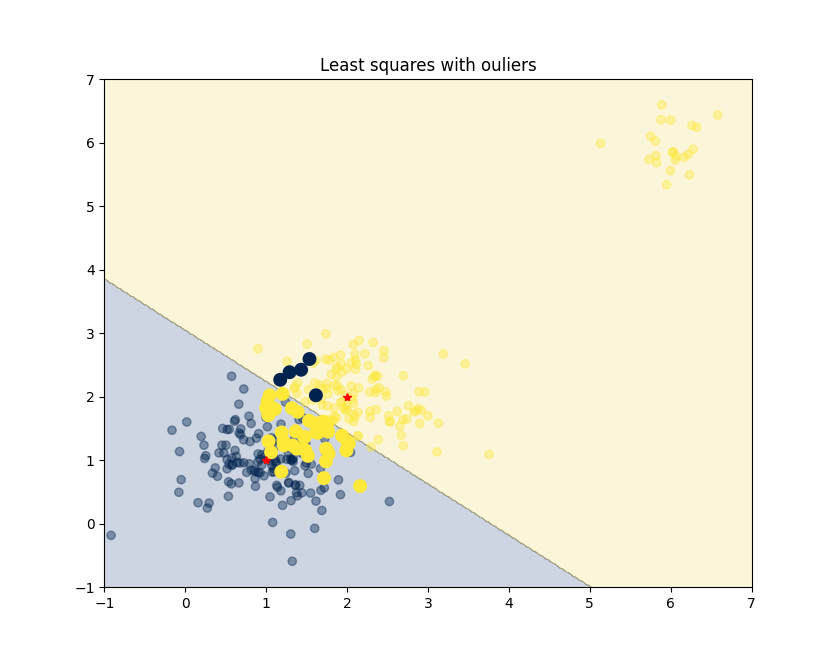

Least squares without outliers accuracy is 90.75%


<IPython.core.display.Javascript object>


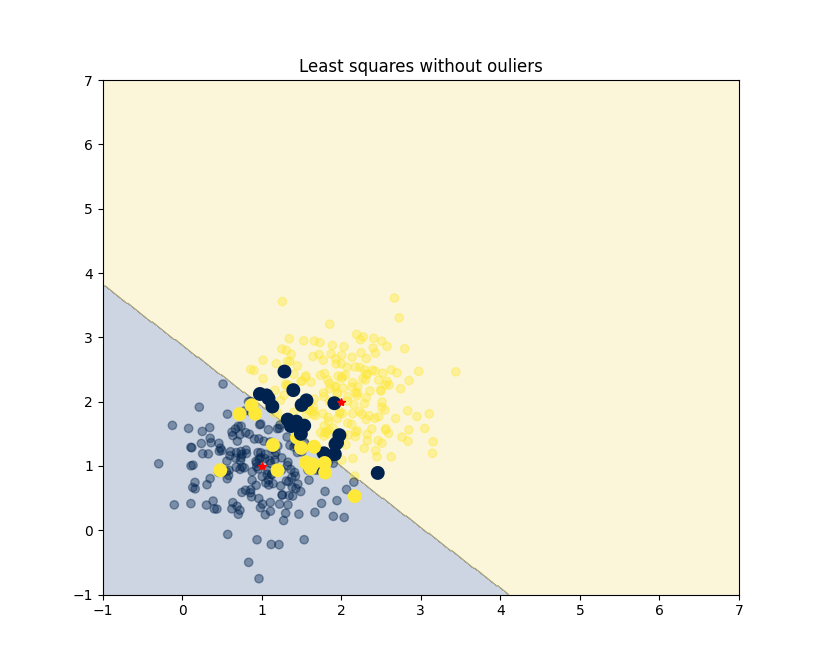

In [17]:
Y_train_one = one_hot_encode(Y_train, 2)
Y_train_one_g = one_hot_encode(Y_train_g, 2)

LS_W, Y_pred = LS_Classify(X_train, Y_train_one, X_valid)
print("Least squares with outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_valid, Y_pred), 2)))

x_grid = np.linspace(-1, 7, 500)
y_grid = np.linspace(-1, 7, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = LS_inference(LS_W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_valid, Y_valid, Y_pred, points=[[1, 1], [2, 2]], title="Least squares with ouliers")

LS_W, Y_pred = LS_Classify(X_train_g, Y_train_one_g, X_test)
print("Least squares without outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))
predictions = LS_inference(LS_W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Least squares without ouliers")

plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

## Outlier analysis with Perceptron approach

MAXIMUM ITERATIONS REACHED!!
Number of miss classification in training = 38
Training accuracy with Perceptron algorithm = 88.3077%

Testing accuracy with Perceptron algorithm = 87.6923%


<IPython.core.display.Javascript object>


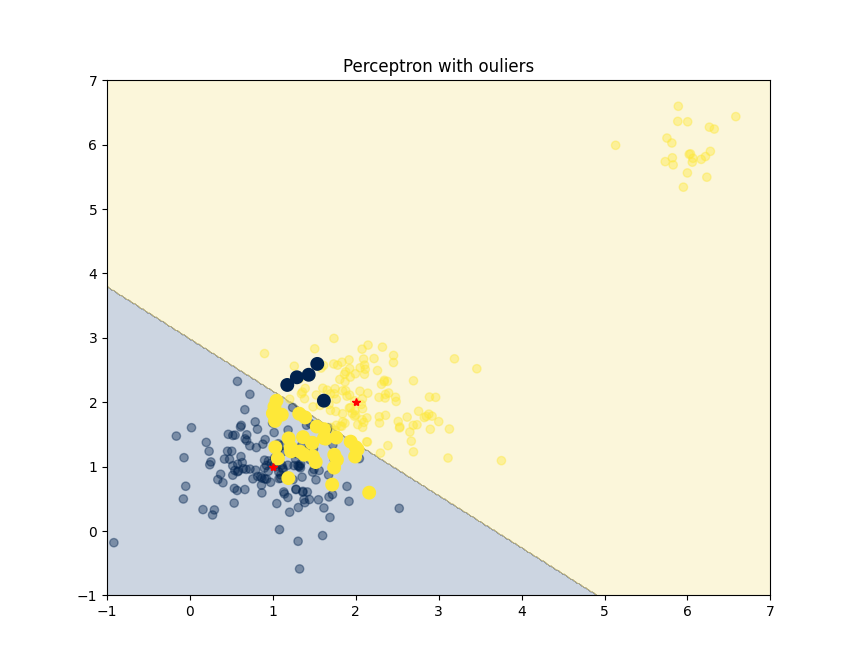

MAXIMUM ITERATIONS REACHED!!
Number of miss classification in training = 65
Training accuracy with Perceptron algorithm = 0.0%

Testing accuracy with Perceptron algorithm = 90.5%


<ipython-input-5-3f4703b06d63>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc = np.mean(Y_test == Y_pred)*100


<IPython.core.display.Javascript object>


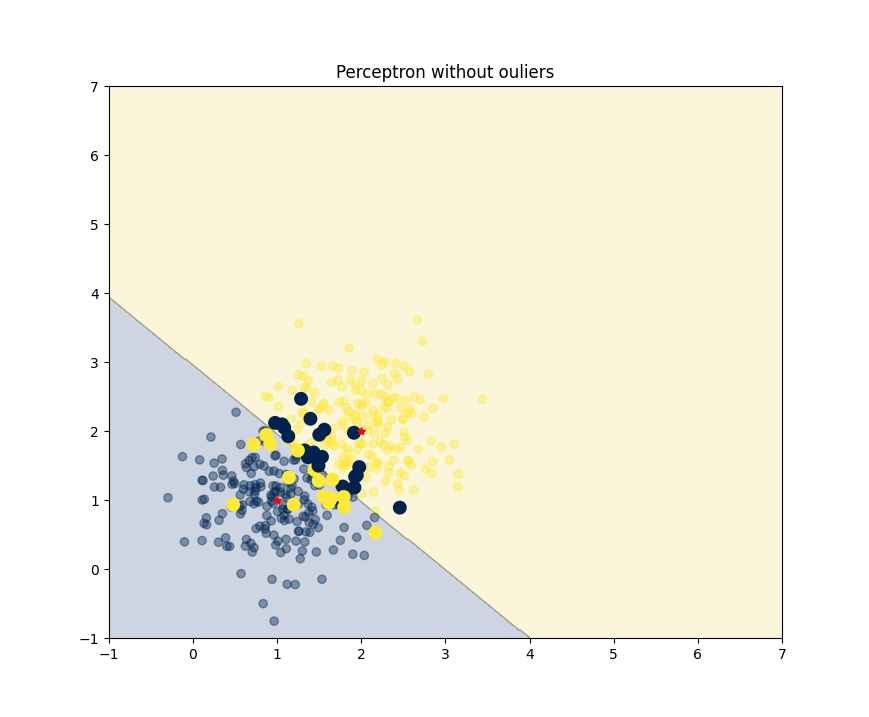

In [18]:
W, ws, Y_pred = Perceptron(X_train, Y_train, X_valid, MAX_ITR=10000, eta=1)
print("\nTesting accuracy with Perceptron algorithm = {}%".format(np.round(LS_Classify_Accuracy(Y_valid, Y_pred), 4)))

x_grid = np.linspace(-1, 7, 500)
y_grid = np.linspace(-1, 7, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = Perceptron_inference(W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_valid, Y_valid, Y_pred, points=[[1, 1], [2, 2]], title="Perceptron with ouliers")

W, ws, Y_pred = Perceptron(X_train_g, Y_train_g, X_test, MAX_ITR=10000, eta=1)
print("\nTesting accuracy with Perceptron algorithm = {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 4)))

predictions = Perceptron_inference(W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Perceptron without ouliers")

plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

<IPython.core.display.Javascript object>


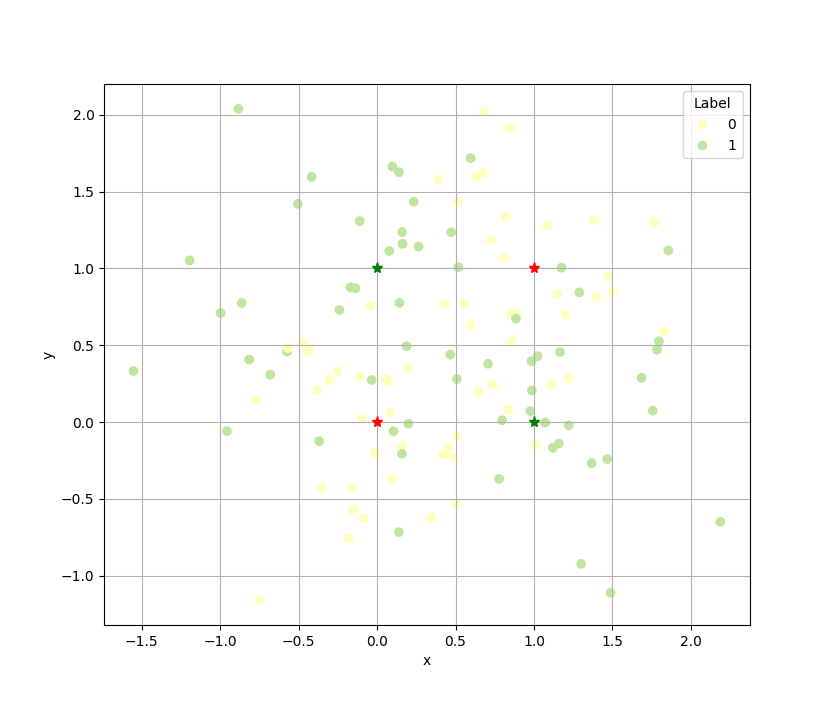

In [19]:
##########################################
#Part-3)-4: Data generation XOR
##########################################

def gen_gau_data_xor(n):
    var = 0.3
    cov = np.diag([var, var])
    
    c0 = [0, 0]
    c1 = [1, 1]
    c2 = [0, 1]
    c3 = [1, 0]
    
    N = n//2
    zeros = np.zeros((N, 1))
    X = np.vstack((np.random.multivariate_normal(mean=c0, cov=cov, size=N),\
                   np.random.multivariate_normal(mean=c1, cov=cov, size=N),\
                   np.random.multivariate_normal(mean=c2, cov=cov, size=N),\
                   np.random.multivariate_normal(mean=c3, cov=cov, size=N)))
    Y = np.vstack((zeros, zeros, zeros+1, zeros+1))
    Y = Y.astype(int)
    idx = np.arange(2*n)
    np.random.shuffle(idx)
    X = X[idx, :]
    Y = Y[idx, :]
    return X, Y

X_train, Y_train = gen_gau_data_xor(60)


fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(0, 0, 'r*', markersize=8)
ax.plot(1, 0, 'g*', markersize=8)
ax.plot(0, 1, 'g*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

MAXIMUM ITERATIONS REACHED!!
Number of miss classification in training = 58
Training accuracy with Perceptron algorithm = 51.6667%


<IPython.core.display.Javascript object>


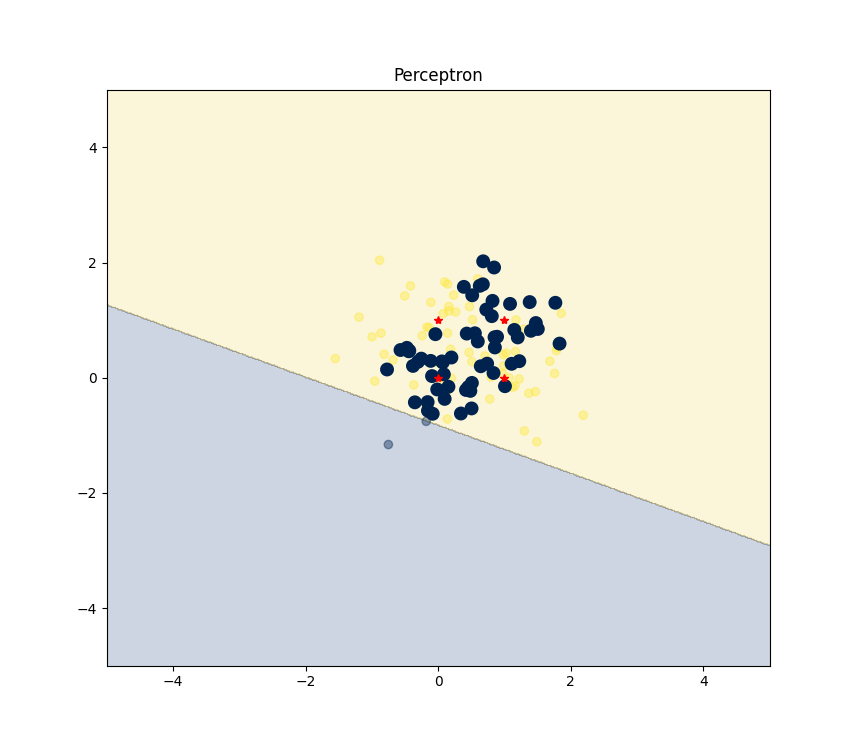

In [20]:
W, ws, Y_pred = Perceptron(X_train, Y_train, X_train, MAX_ITR=2000, eta=1)


x_grid = np.linspace(-5, 5, 500)
y_grid = np.linspace(-5, 5, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = Perceptron_inference(W, grid)
zz = predictions.reshape(xx.shape)


plot_decision_boundary(xx, yy, zz, X_train, Y_train, Y_pred, points=[[0, 0], [1, 1], [0, 1], [1, 0]], title="Perceptron")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [21]:
##########################################
#Part-3)-5: Observations
##########################################

# Observations
## Outliers
1. Observe that boundaries of LS approach with outliers affected a lot but as in perceptron approach the boundary did'not change much.

## Non linear
1. XOR operation is a non linear function thus perceptron does'nt converge. This approach is not sufficient to classify these points.

<b> Part-4) Logistic Regression </b>

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3. Further, generate a test set [X_test, Y_test] from the same distribution, starting with 200 samples per class.
2. Write a function Logistic_Regression to generate predictions Y_pred for the 2-class data generated.
3. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
4. Write a function to generate & visualize the decision boundary between the classes, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.
5. Add true outliers to one of the classes to the data generated in the above generated data and perform the Least Squares classification and Logistic Regression for this data, plot the decision boundary/regions and write your observations on the difference between them.

In [22]:
##################################################
#Part-4)-1: Data generation
##################################################

X_train, Y_train = gen_gau_data(50)
X_test, Y_test = gen_gau_data(200)

In [23]:
##################################################
#Part-4)-2:
##################################################

###############################################
#Part-4)-3:
###############################################

def accuracy(y_hat, y, thres):
    
    Y_pred = np.argmax(y_hat, axis=1)
    Y = np.argmax(y, axis=1)
    
    return np.mean(Y_pred == Y)*100

def softmax(x, temp=1.0):
    e = np.exp(x/temp)
    s = np.sum(e, axis=1).reshape(-1, 1)
    return e/s

def inference(W, X):
    x_biased = np.hstack((X, np.ones((X.shape[0], 1))))
    
    y_pred = softmax(x_biased@W)
    Y_pred = np.argmax(y_pred, axis=1)
    return Y_pred.reshape(-1, 1)
    
def cross_entropy(y_hat, y):
    idx = (y_hat > 0)[:, 0]
    y_hat_ = y_hat[idx, :]
    y_ = y[idx, :]
    return -1*np.sum(y_*np.log2(y_hat_))

def forward(W, X):
    y = X@W
    return softmax(y)

def optimizer(W_init, X, Y, MAX_ITR, eta, thres):
    step = 0
    ws = [W_init]
    y_hat = forward(W_init, X)
    loss = [cross_entropy(y_hat, Y)]
    acc = [accuracy(y_hat, Y, thres)]
    W = W_init
    while step < MAX_ITR:
        W = W + eta*(X.T@(Y - softmax(X@W)))
        y_hat = forward(W, X)
        loss.append(cross_entropy(y_hat, Y))
        acc.append(accuracy(y_hat, Y, thres))
        ws.append(W)
        
        step += 1
    return W, ws, acc, loss
    
def Logistic_Regression(X_train, Y_train, X_test, MAX_ITR = 1000, threshold = 0.5, eta=1e-6, plot_curves=True):
    x_train_biased = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    x_test_biased = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    
    nClasses = (np.unique(Y_train)).shape[0]
    
    y_train = one_hot_encode(Y_train, nClasses)
    y_test = one_hot_encode(Y_test, nClasses)
    
    W_init = np.random.randn(x_train_biased.shape[1], y_train.shape[1])
    
    W, ws, acc, loss = optimizer(W_init, x_train_biased, y_train, MAX_ITR, eta, threshold)
    
    if plot_curves:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title("LOSS")
        plt.plot(loss)
        plt.grid()
        plt.xlabel("#ITR")
        plt.ylabel("Cross entropy")
        
        
        plt.subplot(1, 2, 2)
        plt.title("Accuracy")
        plt.plot(acc)
        plt.grid()
        plt.xlabel("#ITR")
        plt.ylabel("%")
        plt.ylim(0, 100)
        plt.suptitle("Logistic regression")
        plt.show()

    print("Logistic regression accuracy is {}%".format(np.round(LS_Classify_Accuracy(inference(W, X_train), Y_train), 2)))
    
    return W, ws, acc, loss, inference(W, X_test)

<IPython.core.display.Javascript object>


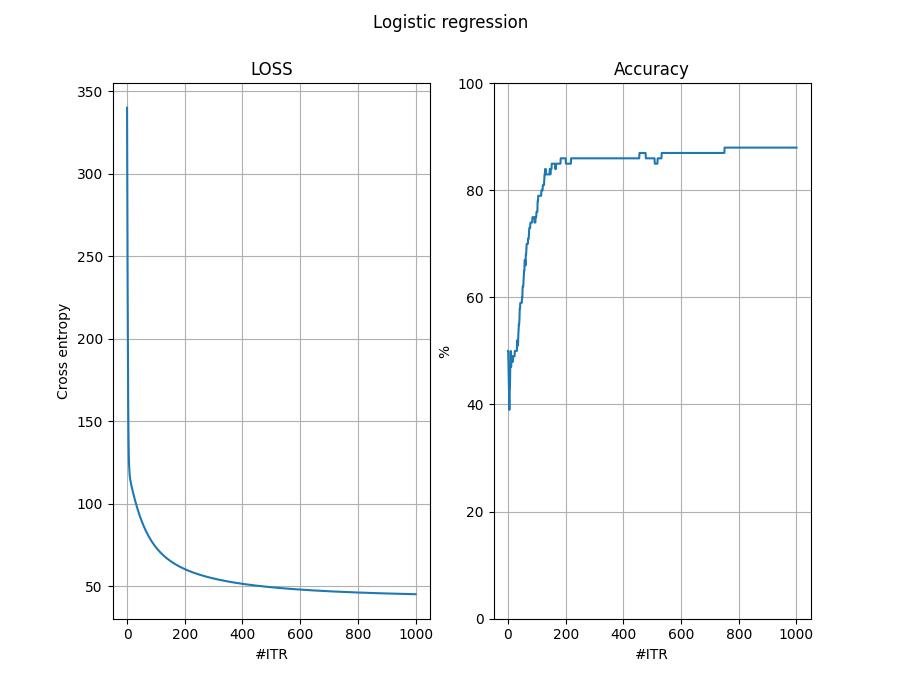

Logistic regression accuracy is 88.0%


In [24]:
W, ws, acc, loss, Y_pred = Logistic_Regression(X_train, Y_train, X_test, MAX_ITR = 1000, threshold = 0.5, eta=1e-3, plot_curves=True)

Logistic regression testing accuracy is 87.25%


<IPython.core.display.Javascript object>


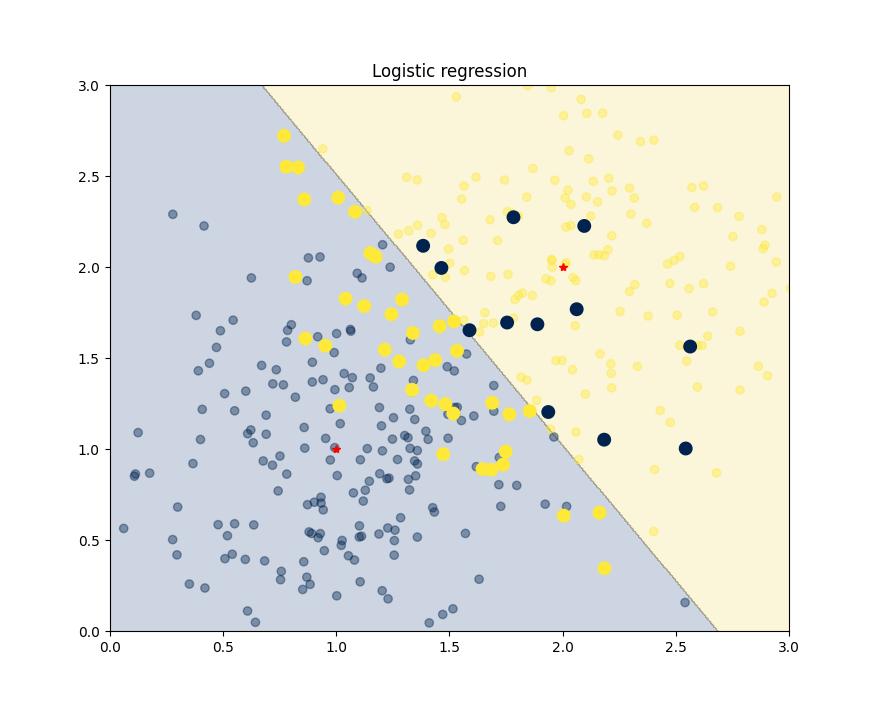

In [25]:
##########################################
#Part-4)-4: Plot the classification results along with decision boundary
##########################################


print("Logistic regression testing accuracy is {}%".format(LS_Classify_Accuracy(Y_pred, Y_test)))

x_grid = np.linspace(0, 3, 500)
y_grid = np.linspace(0, 3, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = inference(W, grid)
zz = predictions.reshape(xx.shape)


plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Logistic regression")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

## Adding outliers

<IPython.core.display.Javascript object>


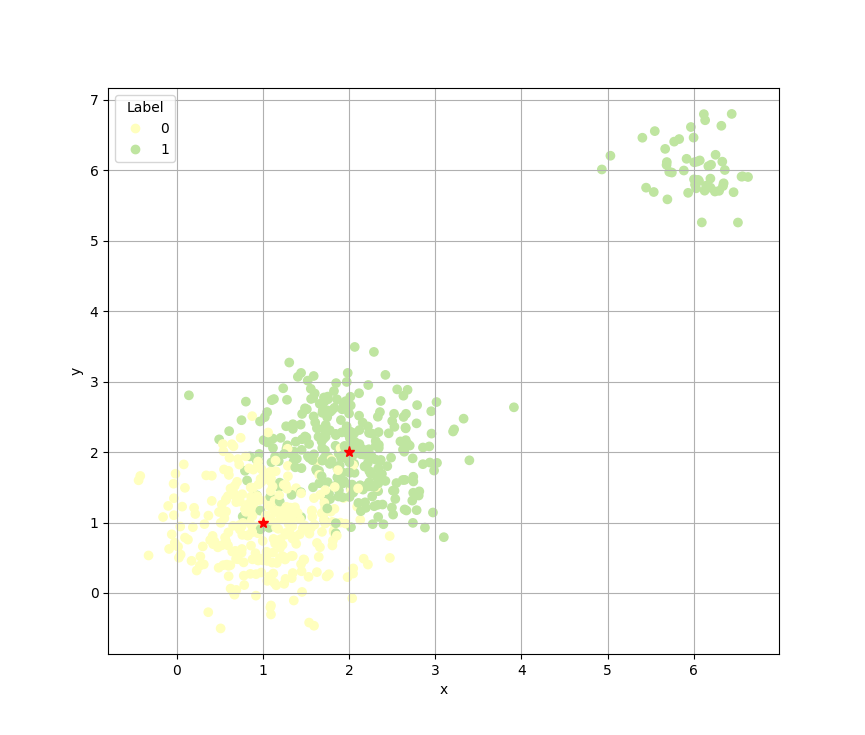

In [26]:
X_train_g, Y_train_g = gen_gau_data(300)
X_train, Y_train = gen_gau_data(50)


N = 50
cov = np.diag([0.1, 0.1])
X_outlier = np.random.multivariate_normal(mean=[6, 6], cov=cov, size=N)
Y_outlier = np.ones((N, 1))

X_new = np.vstack((X_train_g, X_outlier))
Y_new = np.vstack((Y_train_g, Y_outlier))
idx = np.arange(X_new.shape[0])

np.random.shuffle(idx)

X_new = X_new[idx]
Y_new = Y_new[idx]

fig, ax = plt.subplots()
scatter = ax.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(1, 1, 'r*', markersize=8)
ax.plot(2, 2, 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

def split_dataset(X, Y, validation_split):
    m = X.shape[0]
    m_valid = int(validation_split*m)
    
    shuffler = np.arange(m)
    np.random.shuffle(shuffler)

    X_train = X[shuffler[:(m-m_valid)]]
    Y_train = Y[shuffler[:(m-m_valid)]]
    X_valid = X[shuffler[-1*(m_valid):]]
    Y_valid = Y[shuffler[-1*(m_valid):]]
    
    return X_train, X_valid, Y_train, Y_valid 

validation_split = 0.5

X_train, X_valid, Y_train, Y_valid = split_dataset(X_new, Y_new, validation_split)

## Outlier analysis with LS approach

Least squares with outliers accuracy is 90.46%


<IPython.core.display.Javascript object>


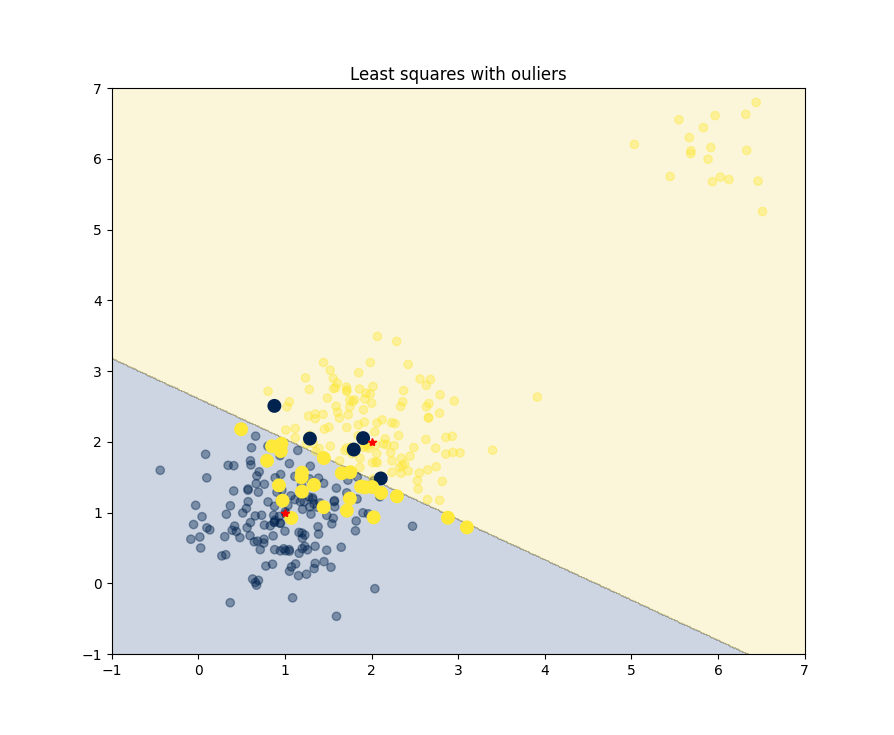

Least squares without outliers accuracy is 88.5%


<IPython.core.display.Javascript object>


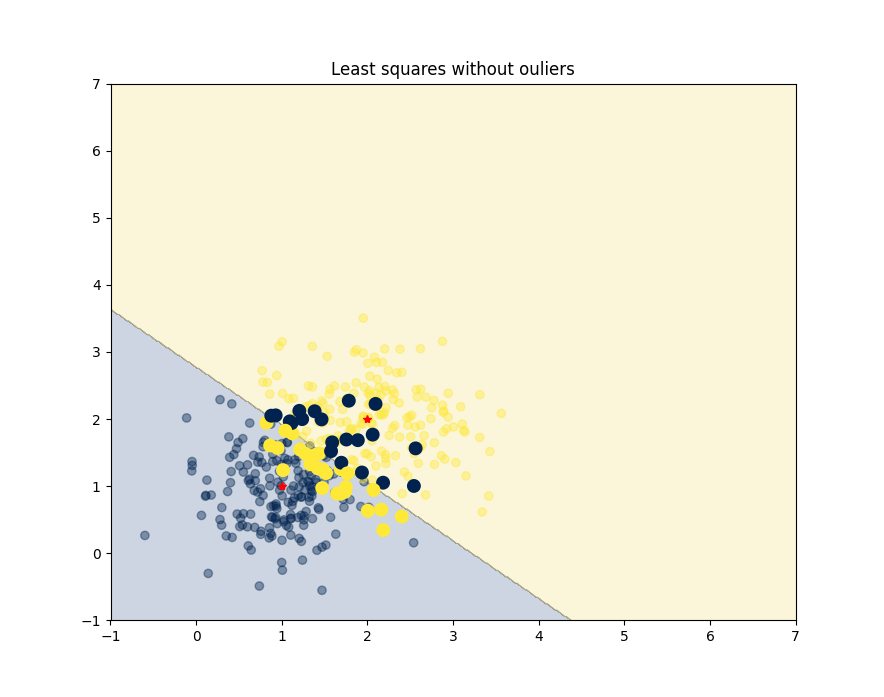

In [27]:
##########################################
#Part-4)-5: Logistic regression for the data with true outliers
##########################################

Y_train_one = one_hot_encode(Y_train, 2)
Y_train_one_g = one_hot_encode(Y_train_g, 2)

LS_W, Y_pred = LS_Classify(X_train, Y_train_one, X_valid)
print("Least squares with outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_valid, Y_pred), 2)))

x_grid = np.linspace(-1, 7, 500)
y_grid = np.linspace(-1, 7, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = LS_inference(LS_W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_valid, Y_valid, Y_pred, points=[[1, 1], [2, 2]], title="Least squares with ouliers")

LS_W, Y_pred = LS_Classify(X_train_g, Y_train_one_g, X_test)
print("Least squares without outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))
predictions = LS_inference(LS_W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Least squares without ouliers")

plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

## Outlier analysis with Logistic regression approach

Logistic regression accuracy is 93.85%
Logistic regression with outliers accuracy is 92.0%


<IPython.core.display.Javascript object>


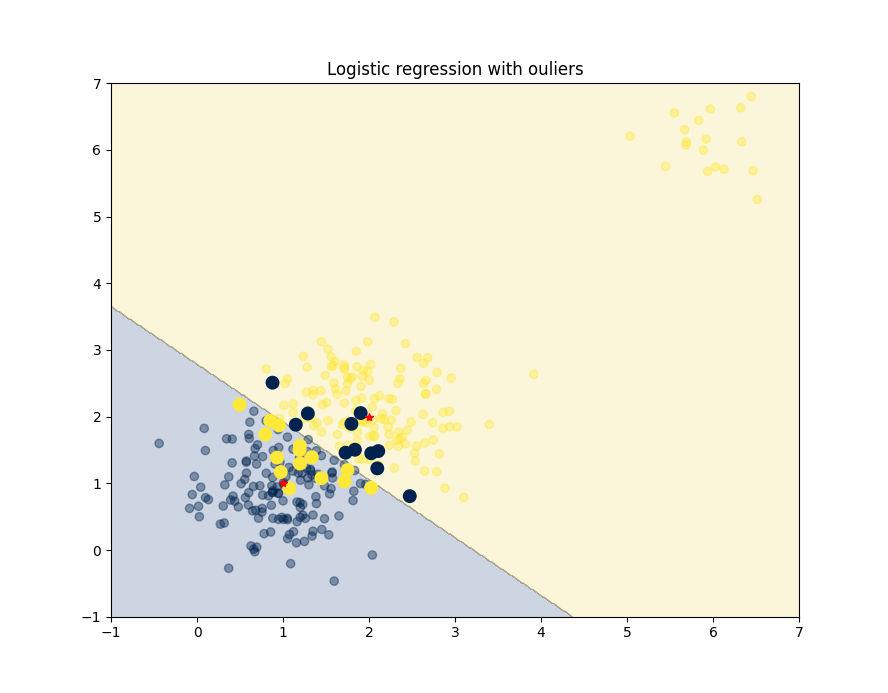

Logistic regression accuracy is 93.85%
Logistic regression with outliers accuracy is 88.5%


<IPython.core.display.Javascript object>


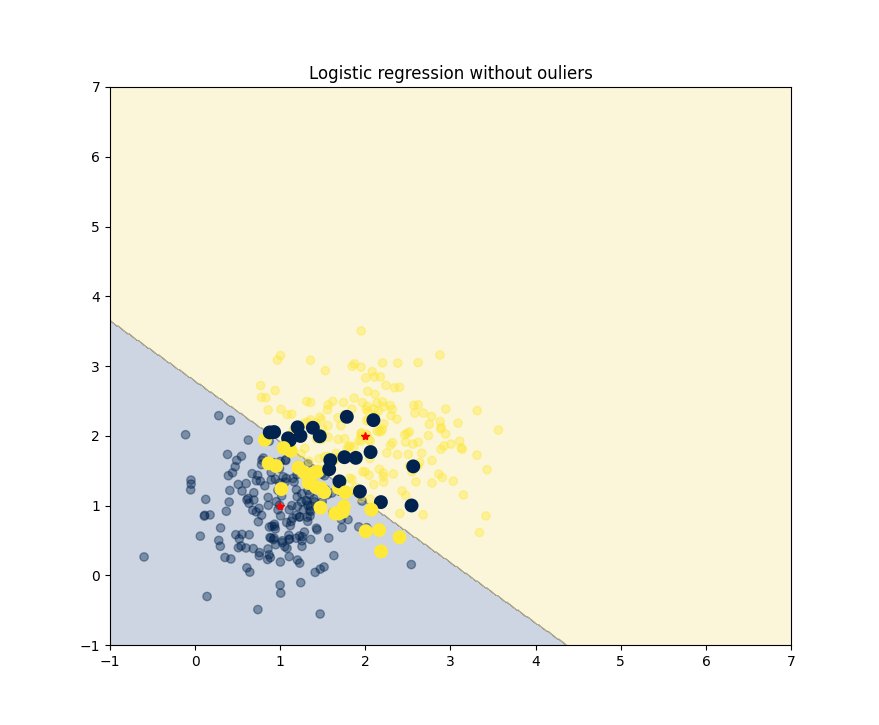

In [28]:
W, ws, acc, loss, Y_pred = Logistic_Regression(X_train, Y_train, X_valid, MAX_ITR = 1000, threshold = 0.5, eta=1e-3, plot_curves=False)
print("Logistic regression with outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_valid, Y_pred), 2)))

x_grid = np.linspace(-1, 7, 500)
y_grid = np.linspace(-1, 7, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = inference(W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_valid, Y_valid, Y_pred, points=[[1, 1], [2, 2]], title="Logistic regression with ouliers")

W, ws, acc, loss, Y_pred = Logistic_Regression(X_train, Y_train, X_test, MAX_ITR = 1000, threshold = 0.5, eta=1e-3, plot_curves=False)
print("Logistic regression with outliers accuracy is {}%".format(np.round(LS_Classify_Accuracy(Y_test, Y_pred), 2)))

predictions = inference(W, grid)
zz = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz, X_test, Y_test, Y_pred, points=[[1, 1], [2, 2]], title="Logistic regression without ouliers")

plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

# Observations
1. We see that logistic regression approach is similar to that of perceptron but it has differentiable function.
2. As expected we see no change in boundary with/without outliers. Whereas in least squares we see that the boundary shifts

<b> Part (5) : Understanding decision boundaries of MAP approach to classification </b> 

Decision boundary in 2 class classification problem is the locus of points satisfying 

<center> $p(c_{1}/x)$ = $p(c_{2}/x)$ </center>

Where $c_{1}$ and $c_{2}$ are the class indicators  and x is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them. 

1. Use Gaussian distribution with appropriate parameters to generate a 2 class synthetic data.

Let us fix the class centers at (1,1) and (3,1). You can chose appropriate variance parameter to get better sepearable data. You are free to change class centers and variance of classes for better visualization.

>  Generate 100 samples from each class amounting to a total of 200 samples. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$

>  Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$

>  Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$

2. Please plots the decision boundaries for all the three cases in three different subplots.

3. Report your observations

**Optional** 
1. Plot the decision boundaries when the covariance matrix of $p(x/c_{1})$ i.e $\Sigma_{1}$ and $p(x/c_{2})$ i.e $\Sigma_{2}$ are different.



<ipython-input-29-e17862bbe048>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


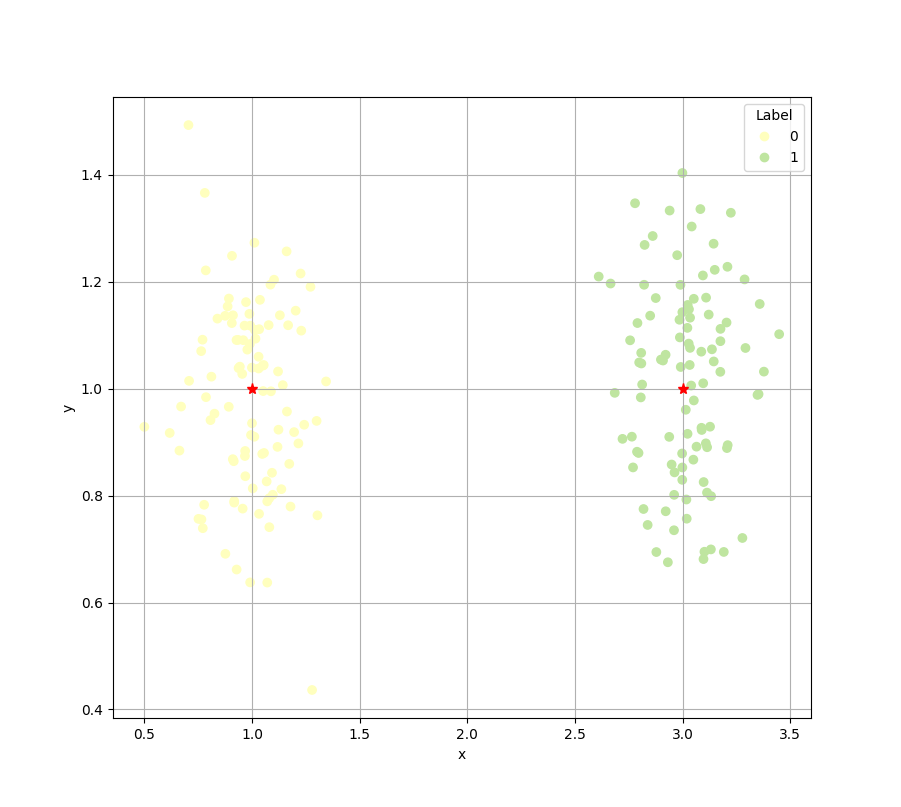

In [29]:
##########################################
#Part-5)-1: Data Generation
##########################################

def gen_gau_data_cust(N1, N2, means, covs):
    cov0, cov1 = covs
    c0, c1 = means
    
    zeros1 = np.zeros((N1, 1))
    zeros2 = np.zeros((N2, 1))
    X = np.vstack((np.random.multivariate_normal(mean=c0, cov=cov0, size=N1), np.random.multivariate_normal(mean=c1, cov=cov1, size=N2)))
    Y = np.vstack((zeros1, zeros2+1))
    Y = Y.astype(int)
    
    idx = np.arange(N1 + N2)
    np.random.shuffle(idx)
    X = X[idx, :]
    Y = Y[idx, :]
    return X, Y

centers = [[1, 1], [3, 1]]
cov = np.diag([0.03, 0.03])
covs = [cov, cov]

X0, Y0 = gen_gau_data_cust(100, 100, centers, covs)
X1, Y1 = gen_gau_data_cust(50, 150, centers, covs)
X2, Y2 = gen_gau_data_cust(150, 50, centers, covs)

X = [X0, X1, X2]
Y = [Y0, Y1, Y2]

fig, ax = plt.subplots()
scatter = ax.scatter(X0[:, 0], X0[:, 1], c=Y0, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(centers[0][0], centers[0][1], 'r*', markersize=8)
ax.plot(centers[1][0], centers[1][1], 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [30]:
def estimate(X, Y):
    t = (Y == 0)[:, 0]
    f = np.logical_not(t)
    
    N1 = np.sum(t)
    N2 = np.sum(f)
    N = N1 + N2
    
    pi1 = N1/N
    pi2 = N2/N
    
    mu1 = np.mean(X[t, :], axis=0).reshape(-1, 1)
    mu2 = np.mean(X[f, :], axis=0).reshape(-1, 1)
    
    sigma1 = (((X[t]-mu1.T).T)@(X[t]-mu1.T))/N1
    sigma2 = (((X[f]-mu2.T).T)@(X[f]-mu2.T))/N2

    return pi1, pi2, mu1, mu2, sigma1, sigma2

def MAP_boundary(X, Y, X_test, sharedCov=True):
    pi1, pi2, mu1, mu2, sigma1, sigma2 = estimate(X, Y)
    sigma_inv1 = np.linalg.inv(sigma1)
    sigma_inv2 = np.linalg.inv(sigma2)
    
    W = sigma_inv1.T@mu1 - sigma_inv2.T@mu2
    w0 = 0.5*mu2.T@sigma_inv2@mu2 - mu1.T@sigma_inv1@mu1 + np.log(pi1/pi2)
    w0 = w0[0, 0]
    
    y = None
    if sharedCov:        
        y = X_test@W + w0
    else:
        P = sigma_inv2 - sigma_inv1
        y = (np.diag(X_test@P@X_test.T).reshape(-1, 1)) + X_test@W + w0

    Y_pred = np.empty_like(y).astype(int)
    f = (y < 0)[:, 0]
    Y_pred[f, :] = 1
    Y_pred[np.logical_not(f), :] = 0
    if sharedCov:
        return W, w0, Y_pred
    return P, W, w0, Y_pred

def MAP_inference(X, W, w0, P=None):
    y = None
    if P is None:
        y = X@W + w0
    else:
        y = (np.diag(X@P@X.T).reshape(-1, 1)) + X@W + w0
    Y_pred = np.empty_like(y).astype(int)
    f = (y < 0)[:, 0]
    Y_pred[f] = 1
    Y_pred[np.logical_not(f), :] = 0
    return Y_pred

In [31]:
##########################################
#Part-5)-2: Classification and decision boundary plots
##########################################
W, w0, Y_pred0 = MAP_boundary(X0, Y0, X0, sharedCov=True)
print("P[C1] = {} MAP accuracy is {}%".format(0.5, np.round(LS_Classify_Accuracy(Y0, Y_pred0), 2)))

x_grid = np.linspace(0, 4, 500)
y_grid = np.linspace(0, 2, 500)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = MAP_inference(grid, W, w0)
zz0 = predictions.reshape(xx.shape)

W, w0, Y_pred1 = MAP_boundary(X1, Y1, X1, sharedCov=True)
print("P[C1] = {} MAP accuracy is {}%".format(0.33, np.round(LS_Classify_Accuracy(Y1, Y_pred1), 2)))
predictions = MAP_inference(grid, W, w0)
zz1 = predictions.reshape(xx.shape)

W, w0, Y_pred2 = MAP_boundary(X2, Y2, X2, sharedCov=True)
print("P[C1] = {} MAP accuracy is {}%".format(0.66, np.round(LS_Classify_Accuracy(Y2, Y_pred2), 2)))
predictions = MAP_inference(grid, W, w0)
zz2 = predictions.reshape(xx.shape)

P[C1] = 0.5 MAP accuracy is 100.0%
P[C1] = 0.33 MAP accuracy is 100.0%
P[C1] = 0.66 MAP accuracy is 99.0%


<IPython.core.display.Javascript object>


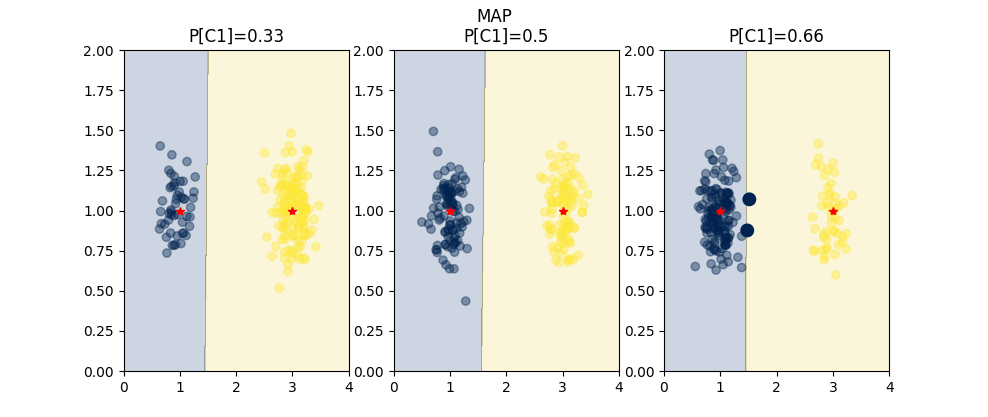

In [32]:
plt.figure()
def plot_decision_boundary_new(j, xx, yy, zz, X_test, Y_test, Y_pred, points=None, title=""):
    plt.subplot(1, 3, j)
    plt.title(title)
    plt.contourf(xx, yy, zz, cmap='cividis', alpha=0.2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='cividis', alpha=0.4)
    wrong_idx = (Y_test != Y_pred)[:, 0]
    
    plt.scatter(X_test[wrong_idx, 0], X_test[wrong_idx, 1], c=Y_test[wrong_idx], cmap='cividis', alpha=1, linewidths=4)
    if points:
        for i in points:
            plt.plot(i[0], i[1], "r*")

plot_decision_boundary_new(1, xx, yy, zz1, X1, Y1, Y_pred1, points=[[1, 1], [3, 1]], title="P[C1]=0.33")
plot_decision_boundary_new(2, xx, yy, zz0, X0, Y0, Y_pred0, points=[[1, 1], [3, 1]], title="P[C1]=0.5")
plot_decision_boundary_new(3, xx, yy, zz2, X2, Y2, Y_pred2, points=[[1, 1], [3, 1]], title="P[C1]=0.66")
plt.suptitle("MAP")
plt.show()

In [33]:
##########################################
#Part-5)-3: Observations
##########################################

# Observations
1. As the probability of one class increases the bias point changes by moving towards it.
2. This probabilistic approach is very useful since we are getting the probability of each point belonging to one class.
3. Among all the aproaches we see that only in this approach we are able to adjust the priors.

P[C1] = 0.5 MAP accuracy is 100.0%


<IPython.core.display.Javascript object>


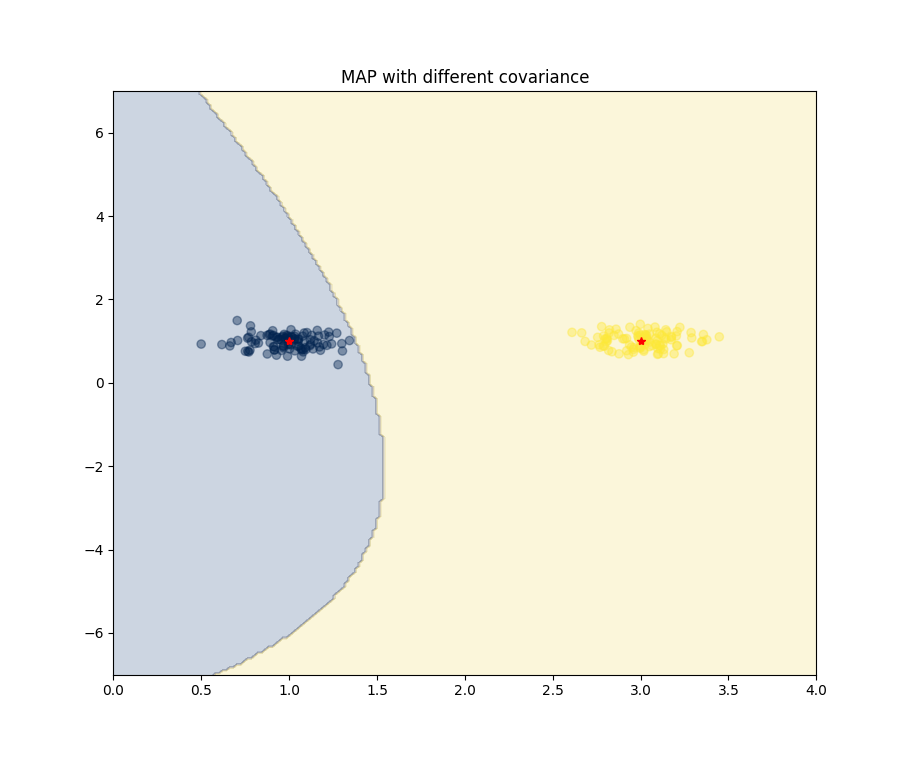

In [34]:
############### OPTIONAL ##################

P, W, w0, Y_pred0 = MAP_boundary(X0, Y0, X0, sharedCov=False)

print("P[C1] = {} MAP accuracy is {}%".format(0.5, np.round(LS_Classify_Accuracy(Y0, Y_pred0), 2)))

x_grid = np.linspace(0, 4, 200)
y_grid = np.linspace(-7, 7, 200)

xx, yy = np.meshgrid(x_grid, y_grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

predictions = MAP_inference(grid, W, w0, P)
zz0 = predictions.reshape(xx.shape)

plot_decision_boundary(xx, yy, zz0, X0, Y0, Y_pred0, points=[[1, 1], [3, 1]], title="MAP with different covariance")

# Observations
1. Since gaussian has 2nd order statistics, having ddifferent boundary will yeild a quadratic boundary.
2. If we choose pdf with higher order statistics we get very complex boundaries.